# Classification Algorithms

[Data pre-processing](#Data-pre-processing)  
[Perceptron](#Perceptron)  
[Plot Decision Boundaries](#Plot-Decision-Boundaries)  
[Logistic Regression](#Logistic-Regression)  
[Support Vector Machine (SVM)](#Support-Vector-Machine)   
[Decision Trees](#Decision-Trees)  
[Random Forest](#Random-Forest)  
[K-Nearest Neighbor (KNN)](#K-Nearest-Neighbor)

## Data pre-processing 

**Load Iris Dataset**

In [1]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
print "Features: {}".format(iris.feature_names)
print "Targets: {}".format(iris.target_names)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets: ['setosa' 'versicolor' 'virginica']


In [2]:
# We will consider only features petal length and petal width 
X = iris.data[:, [2,3]]
y = iris.target
np.unique(y)

array([0, 1, 2])

**Split dataset for training and testing**

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print "Length of train dataset: {} samples".format(X_train.shape[0])
print "Length of test dataset: {} samples".format(X_test.shape[0])

Length of train dataset: 105 samples
Length of test dataset: 45 samples


**Features Standardization**

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Perceptron

In [5]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [6]:
y_pred = ppn.predict(X_test_std)
print "Misclassified samples: {}".format((y_test!=y_pred).sum())

Misclassified samples: 4


In [7]:
from sklearn.metrics import accuracy_score
print "Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [8]:
from sklearn.metrics import confusion_matrix
print "Confusion Matrix: "
print confusion_matrix(y_test, y_pred)

Confusion Matrix: 
[[16  0  0]
 [ 2 15  1]
 [ 0  1 10]]


Other resources: http://scikit-learn.org/stable/modules/model_evaluation.html

## Plot Decision Boundaries

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
#plt.rcParams['figure.figsize'] = (10, 8)

def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

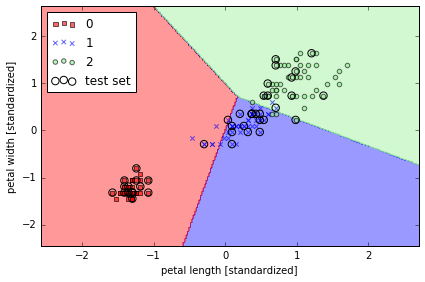

In [11]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(C=1000.0, solver='liblinear', random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

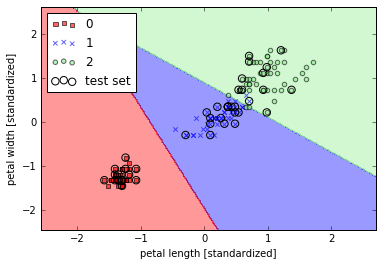

In [13]:
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [14]:
y_pred_lr = lr.predict(X_test_std)
print "Misclassified samples: {}".format((y_test!=y_pred_lr).sum())
print "Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_lr))
print "Confusion Matrix: "
print confusion_matrix(y_test, y_pred_lr)

Misclassified samples: 1
Accuracy: 0.98
Confusion Matrix: 
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


## Support Vector Machine

In [15]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

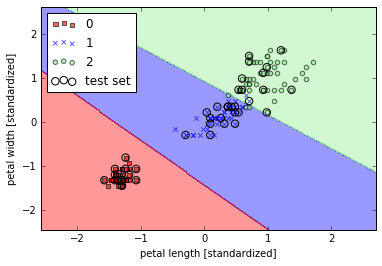

In [16]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [17]:
y_pred_svm = svm.predict(X_test_std)
print "Misclassified samples: {}".format((y_test!=y_pred_svm).sum())
print "Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_svm))
print "Confusion Matrix: "
print confusion_matrix(y_test, y_pred_svm)

Misclassified samples: 1
Accuracy: 0.98
Confusion Matrix: 
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


**Radial Basis Function** (C=1.0, gamma=0.10)

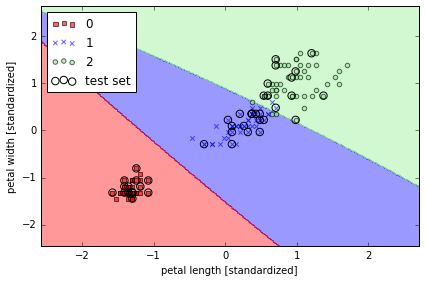

In [18]:
svm = SVC(kernel='rbf', C=1.0, gamma=0.10, random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_rbf_iris_1.png', dpi=300)
plt.show()

In [19]:
y_pred_svm = svm.predict(X_test_std)
print "Misclassified samples: {}".format((y_test!=y_pred_svm).sum())
print "Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_svm))
print "Confusion Matrix: "
print confusion_matrix(y_test, y_pred_svm)

Misclassified samples: 1
Accuracy: 0.98
Confusion Matrix: 
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


**Radial Basis Function** (C=1.0, gamma=10.0)

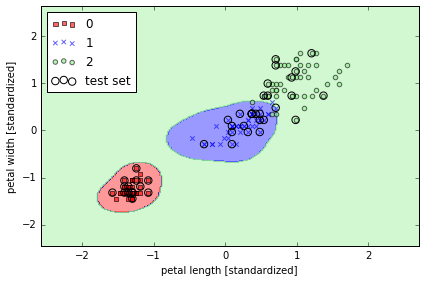

In [20]:
svm = SVC(kernel='rbf', C=1.0, gamma=10.0, random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_rbf_iris_1.png', dpi=300)
plt.show()

In [21]:
y_pred_svm = svm.predict(X_test_std)
print "Misclassified samples: {}".format((y_test!=y_pred_svm).sum())
print "Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_svm))
print "Confusion Matrix: "
print confusion_matrix(y_test, y_pred_svm)

Misclassified samples: 0
Accuracy: 1.00
Confusion Matrix: 
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]


## Decision Trees

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree =  DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

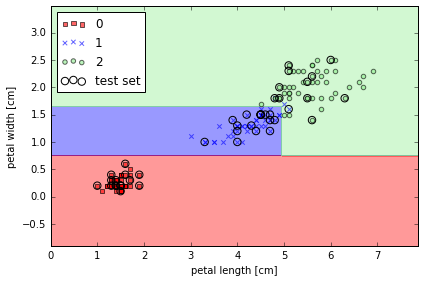

In [23]:
# Plot both train and test set
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined,
                      classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
y_pred_tree = tree.predict(X_test)
print "Misclassified samples: {}".format((y_test!=y_pred_tree).sum())
print "Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_tree))
print "Confusion Matrix: "
print confusion_matrix(y_test, y_pred_tree)

Misclassified samples: 1
Accuracy: 0.98
Confusion Matrix: 
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


### Plot Decision Tree

* **First method**

In [25]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', feature_names=['petal length', 'petal width'])
!dot -Tpng tree.dot -o tree.png

* **Second method**

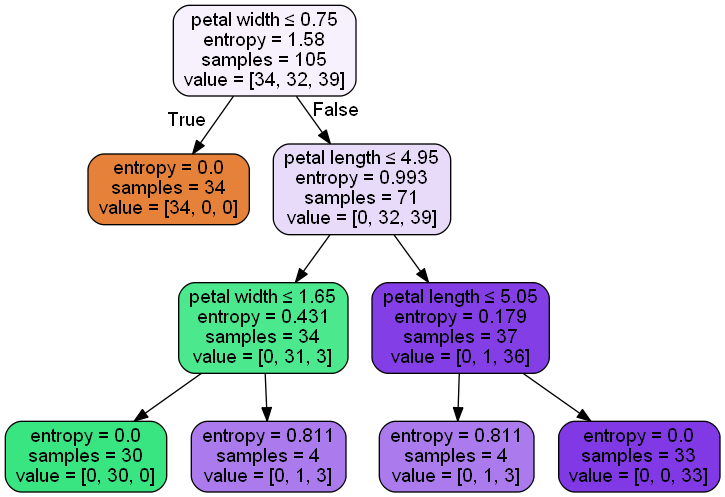

In [26]:
from sklearn.externals.six import StringIO  
import pydotplus
from IPython.display import Image  

dot_data = StringIO()

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=['petal length', 'petal width'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Other resources: http://people.revoledu.com/kardi/tutorial/DecisionTree/how-to-train-decision-tree.htm

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

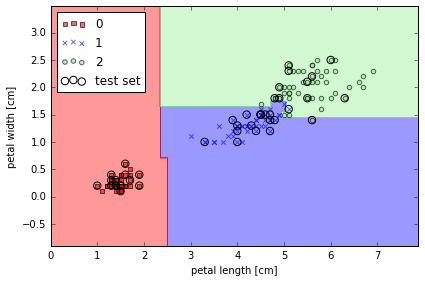

In [28]:
plot_decision_regions(X_combined, y_combined,
                      classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [29]:
y_pred_forest = forest.predict(X_test)
print "Misclassified samples: {}".format((y_test!=y_pred_forest).sum())
print "Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_forest))
print "Confusion Matrix: "
print confusion_matrix(y_test, y_pred_forest)

Misclassified samples: 2
Accuracy: 0.96
Confusion Matrix: 
[[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]


Other resources:  
https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/  
http://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf

## K-Nearest Neighbor 

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

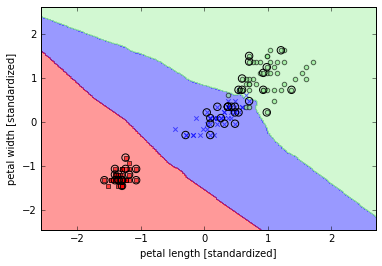

In [31]:
plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()

In [32]:
y_pred_knn = knn.predict(X_test_std)
print "Misclassified samples: {}".format((y_test!=y_pred_knn).sum())
print "Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_knn))
print "Confusion Matrix: "
print confusion_matrix(y_test, y_pred_knn)

Misclassified samples: 0
Accuracy: 1.00
Confusion Matrix: 
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
